In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data
cc_fraud_df = pd.read_csv('creditcardcsvpresent.csv')
cc_fraud_df.head()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [4]:
cc_fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Transaction date                0 non-null      float64
 2   Average Amount/transaction/day  3075 non-null   float64
 3   Transaction_amount              3075 non-null   float64
 4   Is declined                     3075 non-null   object 
 5   Total Number of declines/day    3075 non-null   int64  
 6   isForeignTransaction            3075 non-null   object 
 7   isHighRiskCountry               3075 non-null   object 
 8   Daily_chargeback_avg_amt        3075 non-null   int64  
 9   6_month_avg_chbk_amt            3075 non-null   float64
 10  6-month_chbk_freq               3075 non-null   int64  
 11  isFradulent                     3075 non-null   object 
dtypes: float64(4), int64(4), object(4)

In [5]:
# remove column Transaction date
cc_fraud_df = cc_fraud_df.drop('Transaction date', axis=1)
cc_fraud_df.head()

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [6]:
# check for missing values
cc_fraud_df.isnull().sum()

Merchant_id                       0
Average Amount/transaction/day    0
Transaction_amount                0
Is declined                       0
Total Number of declines/day      0
isForeignTransaction              0
isHighRiskCountry                 0
Daily_chargeback_avg_amt          0
6_month_avg_chbk_amt              0
6-month_chbk_freq                 0
isFradulent                       0
dtype: int64

In [7]:
# change Y N to 1 0
cc_fraud_df['Is declined'] = cc_fraud_df['Is declined'].map({'Y': 1, 'N': 0})
cc_fraud_df['isForeignTransaction'] = cc_fraud_df['isForeignTransaction'].map({'Y': 1, 'N': 0})
cc_fraud_df['isHighRiskCountry'] = cc_fraud_df['isHighRiskCountry'].map({'Y': 1, 'N': 0})
cc_fraud_df['isFradulent'] = cc_fraud_df['isFradulent'].map({'Y': 1, 'N': 0})
cc_fraud_df.head()

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,100.0,3000.0,0,5,1,1,0,0.0,0,1
1,3160040998,100.0,4300.0,0,5,1,1,0,0.0,0,1
2,3160041896,185.5,4823.0,1,5,0,0,0,0.0,0,1
3,3160141996,185.5,5008.5,1,8,0,0,0,0.0,0,1
4,3160241992,500.0,26000.0,0,0,1,1,800,677.2,6,1


In [8]:
cc_fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Average Amount/transaction/day  3075 non-null   float64
 2   Transaction_amount              3075 non-null   float64
 3   Is declined                     3075 non-null   int64  
 4   Total Number of declines/day    3075 non-null   int64  
 5   isForeignTransaction            3075 non-null   int64  
 6   isHighRiskCountry               3075 non-null   int64  
 7   Daily_chargeback_avg_amt        3075 non-null   int64  
 8   6_month_avg_chbk_amt            3075 non-null   float64
 9   6-month_chbk_freq               3075 non-null   int64  
 10  isFradulent                     3075 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 264.4 KB


### Label Breakdown:
(0, 0): True Negative (TN) – Transactions that are not fraudulent and not declined.

(0, 1): False Positive (FP) – Transactions that are not fraudulent but declined.

(1, 0): False Negative (FN) – Transactions that are fraudulent but not declined.

(1, 1): True Positive (TP) – Transactions that are fraudulent and declined.

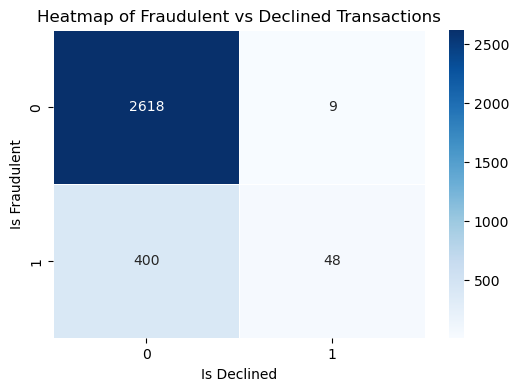

In [9]:
## Create a cross-tabulation (frequency table) for isFraudulent and isDeclined
heatmap_data = pd.crosstab(cc_fraud_df['isFradulent'], cc_fraud_df['Is declined'])

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='d', linewidths=0.5)
plt.xlabel('Is Declined')
plt.ylabel('Is Fraudulent')
plt.title('Heatmap of Fraudulent vs Declined Transactions')
plt.show()
# Create a cross-tabulation (frequency table) for isFraudulent and isDeclined
heatmap_data = pd.crosstab(cc_fraud_df['isFradulent'], cc_fraud_df['Is declined'])



In [10]:
# rename long columns for ease of use
cc_fraud_df = cc_fraud_df.rename(columns={'Average Amount/transaction/day': 'Avg Amount Per Day',
                                          'Total Number of declines/day': 'Number of declines per Day',
                                          '6-month_chbk_freq': '6-month chargeback freq'})
cc_fraud_df.head()


,Merchant_id,Avg Amount Per Day,Transaction_amount,Is declined,Number of declines per Day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month chargeback freq,isFradulent
0,3160040998,100.0,3000.0,0,5,1,1,0,0.0,0,1
1,3160040998,100.0,4300.0,0,5,1,1,0,0.0,0,1
2,3160041896,185.5,4823.0,1,5,0,0,0,0.0,0,1
3,3160141996,185.5,5008.5,1,8,0,0,0,0.0,0,1
4,3160241992,500.0,26000.0,0,0,1,1,800,677.2,6,1


In [11]:
# split and train the data
from sklearn.model_selection import train_test_split


X = cc_fraud_df.drop('isFradulent', axis=1)
y = cc_fraud_df['isFradulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Accuracy: 0.14796747967479676
Confusion Matrix:
 [[ 17 495]
 [ 29  74]]


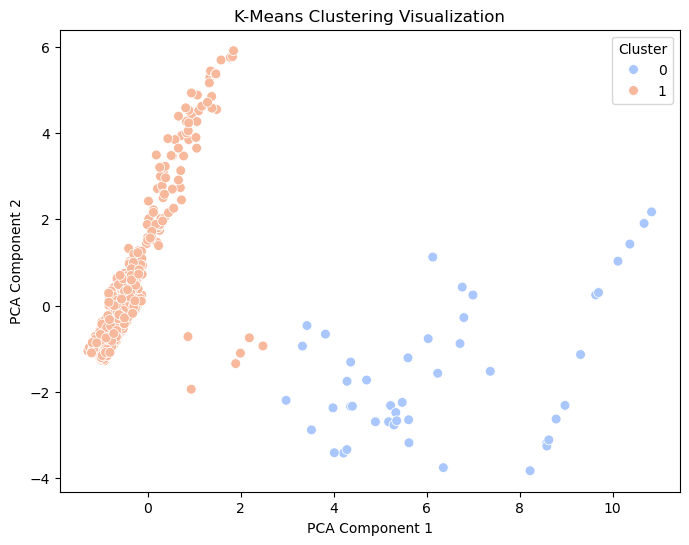

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix

# Train the clustering model
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

# Predict the clusters for the test data
y_pred = kmeans.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', confusion)

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_test_2D = pca.fit_transform(X_test)

# Scatter plot to visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test_2D[:, 0], y=X_test_2D[:, 1], hue=y_pred, palette='coolwarm', s=50)
plt.title("K-Means Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


Accuracy: 0.14796747967479676
Confusion Matrix:
 [[ 17 495]
 [ 29  74]]


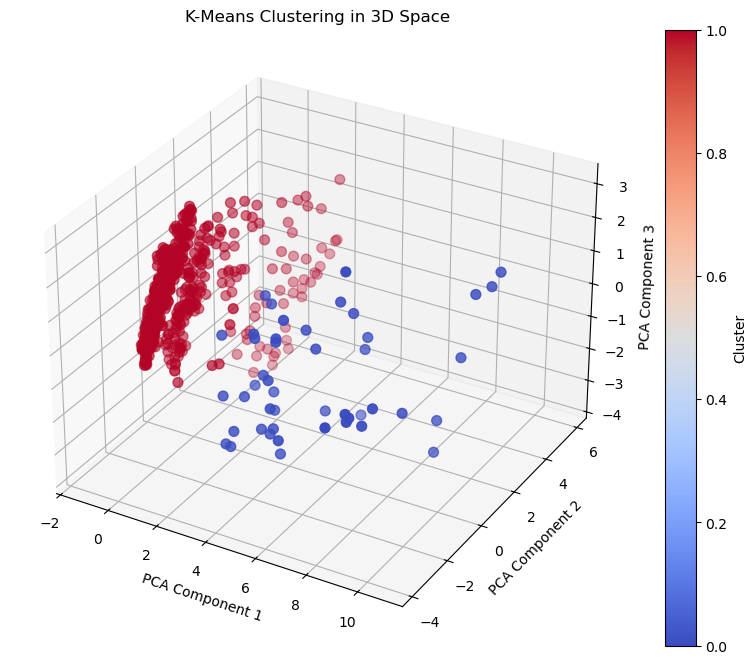

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix

# Train the clustering model
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

# Predict the clusters for the test data
y_pred = kmeans.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', confusion)

# Reduce dimensions to 3D for visualization
pca = PCA(n_components=3)
X_test_3D = pca.fit_transform(X_test)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with data points colored by predicted cluster
scatter = ax.scatter(X_test_3D[:, 0], X_test_3D[:, 1], X_test_3D[:, 2], c=y_pred, cmap='coolwarm', s=50)

# Add labels and title
ax.set_title("K-Means Clustering in 3D Space")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")

# Add color bar for cluster labels
cbar = fig.colorbar(scatter)
cbar.set_label('Cluster')

# Show the plot
plt.show()


In [14]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Assuming X_train, X_test, and y_test are already defined

# Train the K-Means clustering model
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

# Predict the clusters for the test data
y_pred = kmeans.predict(X_test)

# Reduce the data to 3 components using PCA for 3D visualization
pca = PCA(n_components=3)
X_test_3D = pca.fit_transform(X_test)

# Create a DataFrame for easy plotting with Plotly
df = pd.DataFrame(X_test_3D, columns=['PCA Component 1', 'PCA Component 2', 'PCA Component 3'])
df['Cluster'] = y_pred

# Create the interactive 3D scatter plot
fig = px.scatter_3d(df, 
                    x='PCA Component 1', 
                    y='PCA Component 2', 
                    z='PCA Component 3', 
                    color='Cluster', 
                    title="3D K-Means Clustering Visualization",
                    labels={'PCA Component 1': 'PC1', 
                            'PCA Component 2': 'PC2', 
                            'PCA Component 3': 'PC3', 
                            'Cluster': 'Cluster ID'})

# Show the plot
fig.show()


Accuracy: 0.848780487804878
Confusion Matrix:
 [[493  19]
 [ 74  29]]


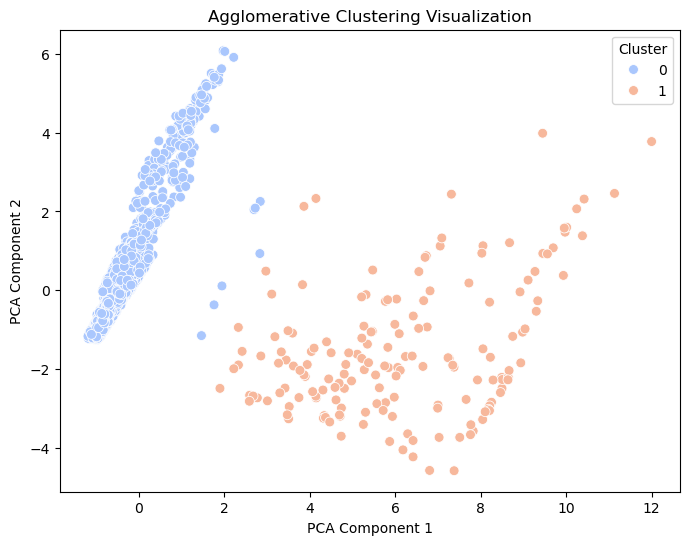

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score, confusion_matrix

# Train on training data
agg_train = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_train_pred = agg_train.fit_predict(X_train)

# Train a new model for test data (since Agglomerative Clustering doesn’t generalize)
agg_test = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_test_pred = agg_test.fit_predict(X_test)

# Compute "accuracy" by comparing clusters with true labels (not always meaningful for clustering)
accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy:', accuracy)

# Confusion matrix
confusion = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:\n', confusion)

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)

# Scatter plot to visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_2D[:, 0], y=X_train_2D[:, 1], hue=y_train_pred, palette='coolwarm', s=50)
plt.title("Agglomerative Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()
